In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  #顯示中文
plt.rcParams['axes.unicode_minus'] = False 

%matplotlib inline

In [2]:
# Load in the train datasets
train = pd.read_csv('input/train.csv', encoding = "utf-8", dtype = {'type': np.int32})
test = pd.read_csv('input/test.csv', encoding = "utf-8")
submission = pd.read_csv('input/submission.csv', encoding = "utf-8", dtype = {'type': np.int32})

In [3]:
print('train shape :', train.shape)
print('test shape :', test.shape)
print('submission shape :', submission.shape)

train shape : (123, 7)
test shape : (30, 5)
submission shape : (30, 2)


In [4]:
train.head(3)

,id,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種,type
0,1,5.4,3.7,1.5,0.2,Iris-setosa,1
1,2,4.8,3.4,1.6,0.2,Iris-setosa,1
2,3,4.8,3.0,1.4,0.1,Iris-setosa,1


In [5]:
test.head(3)

,id,花萼長度,花萼寬度,花瓣長度,花瓣寬度
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2


In [6]:
submission.head(3)

,id,type
0,1,1
1,2,1
2,3,1


# EDA

In [7]:
train.describe()

,id,花萼長度,花萼寬度,花瓣長度,花瓣寬度,type
count,123.000000,122.000000,122.000000,123.000000,123.000000,123.000000
mean,62.000000,5.840164,3.058197,3.764228,1.204878,2.048780
std,35.651087,0.790926,0.445332,1.731536,0.754425,0.867006
min,1.000000,4.300000,2.000000,1.000000,0.100000,1.000000
25%,31.500000,5.200000,2.800000,1.600000,0.300000,1.000000
50%,62.000000,5.800000,3.000000,4.300000,1.300000,2.000000
75%,92.500000,6.375000,3.300000,5.100000,1.800000,3.000000
max,123.000000,7.900000,4.400000,6.900000,2.500000,4.000000


In [8]:
train.屬種.unique().tolist()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-new_type']

In [9]:
#one-hot encoding
df1 = pd.get_dummies(train['屬種'])
df1.sample(5)

,Iris-new_type,Iris-setosa,Iris-versicolor,Iris-virginica
66,0,0,1,0
55,0,0,1,0
71,0,0,1,0
115,0,0,0,1
79,0,0,1,0


In [10]:
#LabelEncoding
df2 = train['屬種'].replace({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})
df2.sample(5)

106    3
81     3
26     1
67     2
25     1
Name: 屬種, dtype: object

In [11]:
#missing data
miss_sum = train.isnull().sum().sort_values(ascending=False)
miss_sum

花萼寬度    1
花萼長度    1
type    0
屬種      0
花瓣寬度    0
花瓣長度    0
id      0
dtype: int64

In [12]:
#查詢那幾筆是空值
print(train[train['花萼寬度'].isnull()])
print("--------------------------------")
print(train[train['花萼長度'].isnull()])

      id  花萼長度  花萼寬度  花瓣長度  花瓣寬度             屬種  type
121  122   5.2   NaN   5.1   1.8  Iris-new_type     4
--------------------------------
      id  花萼長度  花萼寬度  花瓣長度  花瓣寬度             屬種  type
120  121   NaN   3.0   4.9   1.2  Iris-new_type     4


In [13]:
#直接把 NaN drop (如果筆數很少,不影響建模的時候)
train_d_na = train.dropna().reset_index(drop=True)
train_d_na.isnull().sum().sort_values(ascending=False)

type    0
屬種      0
花瓣寬度    0
花瓣長度    0
花萼寬度    0
花萼長度    0
id      0
dtype: int64

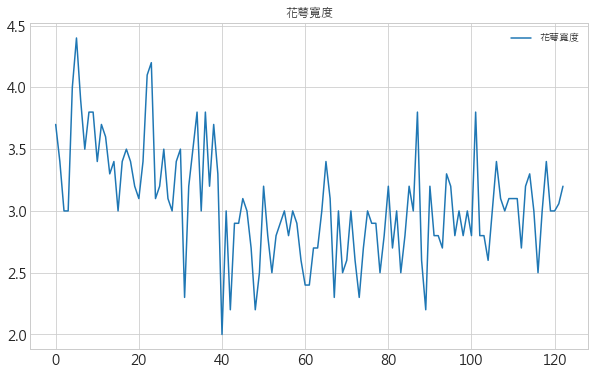

In [14]:
#將空值補平均數
#train.loc[train['花萼寬度'].isnull(),['花萼寬度']] = train['花萼寬度'].mean() #花萼寬度:第2欄
train[['花萼寬度']] = train[['花萼寬度']].fillna(np.mean(train[['花萼寬度']]))

train.plot(kind='line',y=u'花萼寬度',figsize=(10,6),fontsize=14,title=u'花萼寬度')

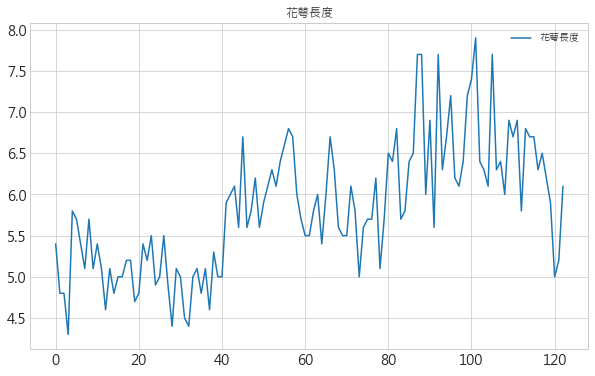

In [15]:
#將空值補眾數
#train.loc[train['花萼長度'].isnull(),['花萼長度']] = train['花萼長度'].mode()[0] #花萼長度:第1欄
train[['花萼長度']] = train[['花萼長度']].fillna(train['花萼長度'].mode()[0])

train.plot(kind='line',y='花萼長度',figsize=(10,6),fontsize=14,title='花萼長度')

## Correlation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF3FBDC0F0>,
      dtype=object)

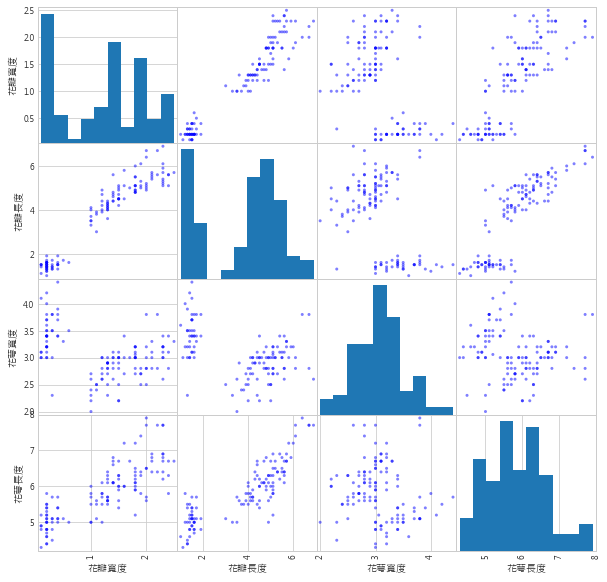

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix( train[['花瓣寬度','花瓣長度','花萼寬度','花萼長度']],figsize=(10, 10),color='b')

In [17]:
corr = train[['花瓣寬度','花瓣長度','花萼寬度','花萼長度']].corr()
print(corr)

          花瓣寬度      花瓣長度      花萼寬度      花萼長度
花瓣寬度  1.000000  0.958595 -0.367957  0.810219
花瓣長度  0.958595  1.000000 -0.436213  0.850649
花萼寬度 -0.367957 -0.436213  1.000000 -0.130174
花萼長度  0.810219  0.850649 -0.130174  1.000000


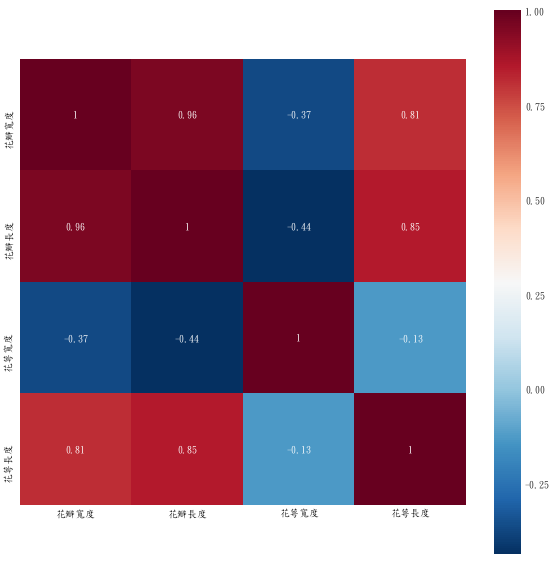

In [18]:
plt.rcParams['font.family']='DFKai-SB' #顯示中文
plt.figure(figsize=(10,10))
sns.heatmap(corr, square=True, annot=True, cmap="RdBu_r") #center=0, cmap="YlGnBu"
#sns.plt.show()

# http://seaborn.pydata.org/tutorial/color_palettes.html

## Outlier

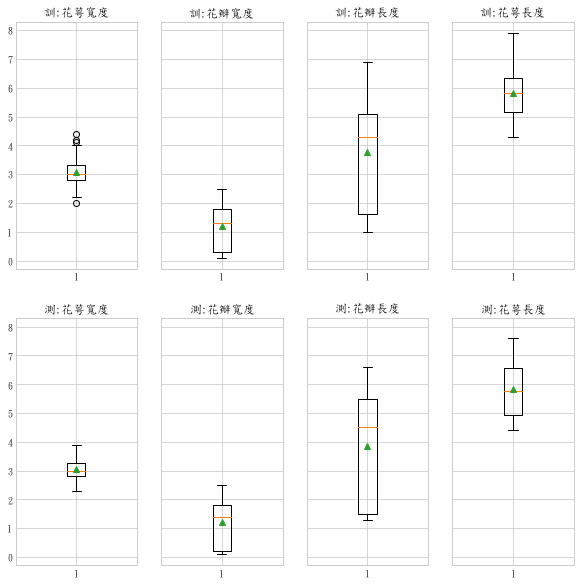

In [19]:
#train[['花瓣寬度','花瓣長度','花萼寬度','花萼長度']]
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 10), sharey=True)

axes[0, 0].boxplot(train['花萼寬度'],showmeans=True)
axes[0, 0].set_title('訓:花萼寬度')

axes[0, 1].boxplot(train['花瓣寬度'],showmeans=True)
axes[0, 1].set_title('訓:花瓣寬度')

axes[0, 2].boxplot(train['花瓣長度'],showmeans=True)
axes[0, 2].set_title('訓:花瓣長度')

axes[0, 3].boxplot(train['花萼長度'],showmeans=True)
axes[0, 3].set_title('訓:花萼長度')

axes[1, 0].boxplot(test['花萼寬度'],showmeans=True)
axes[1, 0].set_title('測:花萼寬度')

axes[1, 1].boxplot(test['花瓣寬度'],showmeans=True)
axes[1, 1].set_title('測:花瓣寬度')

axes[1, 2].boxplot(test['花瓣長度'],showmeans=True)
axes[1, 2].set_title('測:花瓣長度')

axes[1, 3].boxplot(test['花萼長度'],showmeans=True)
axes[1, 3].set_title('測:花萼長度')

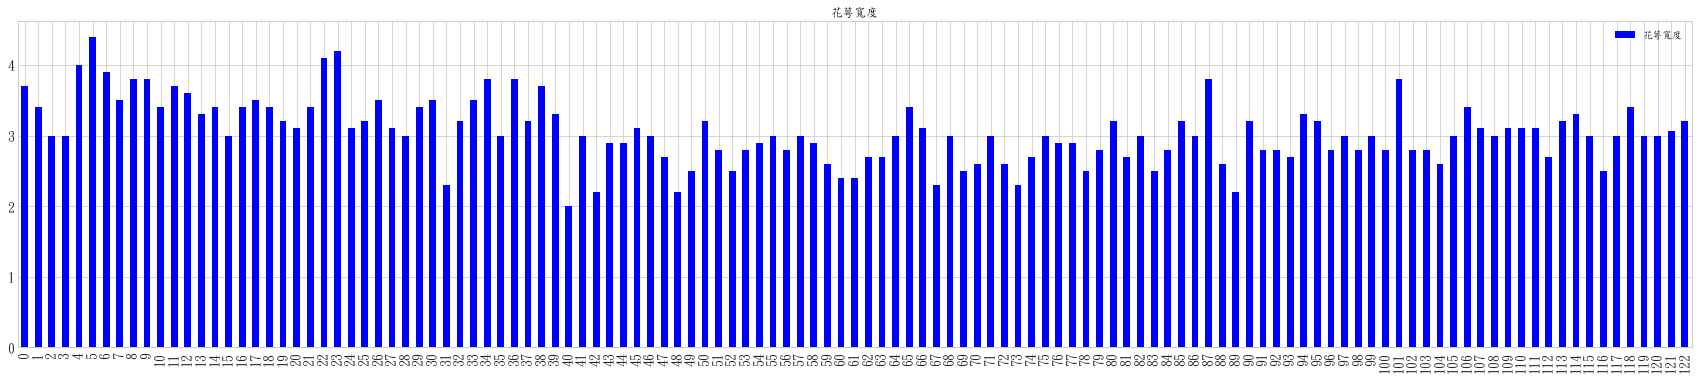

In [20]:
train.plot(kind='bar',y='花萼寬度',figsize=(30,6),fontsize=14,title='花萼寬度', color = 'b')

In [21]:
#IQR = Q3-Q1
IQR = np.percentile(train['花萼寬度'],75) - np.percentile(train['花萼寬度'],25)

In [22]:
#上界 = Q3 + 1.5*IQR
train[train['花萼寬度'] > np.percentile(train['花萼寬度'],75)+1.5*IQR]

,id,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種,type
5,6,5.7,4.4,1.5,0.4,Iris-setosa,1
22,23,5.2,4.1,1.5,0.1,Iris-setosa,1
23,24,5.5,4.2,1.4,0.2,Iris-setosa,1


In [23]:
#下界 = Q1 - 1.5*IQR
train[train['花萼寬度'] < np.percentile(train['花萼寬度'],25)-1.5*IQR]

,id,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種,type
40,41,5.0,2.0,3.5,1.0,Iris-versicolor,2


In [24]:
#fix_X = X.drop(X.index[[5,23,40]])
#fix_y = y.drop(y.index[[5,23,40]])

# Split

In [25]:
train = train[train['type']!=4]

In [26]:
from sklearn.model_selection import train_test_split

X = train[['花瓣寬度','花瓣長度','花萼寬度','花萼長度']]
y = train['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=889)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [28]:
X_train_std[0:5]

array([[ 0.50761319,  0.53173867, -0.36985324,  0.33625407],
       [ 0.23251959,  0.29541037, -0.16273543, -0.22305963],
       [ 0.92025358,  0.88623111, -0.16273543,  0.19642565],
       [ 0.23251959,  0.29541037, -0.57697106, -0.08323121],
       [-1.2804952 , -1.35888771,  0.87285365, -0.36288806]])

In [29]:
y_test[0:5]

59     2
77     2
100    3
7      1
15     1
Name: type, dtype: int32

## KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(X_train_std, y_train)

print(metrics.classification_report(y_test, knn.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, knn.predict(X_test_std)))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        11
          2       1.00      0.78      0.88         9
          3       0.89      1.00      0.94        16

avg / total       0.95      0.94      0.94        36

[[11  0  0]
 [ 0  7  2]
 [ 0  0 16]]


## Random Forest

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500, criterion='gini', max_features='auto', oob_score=True)
rfc.fit(X_train, y_train) #不標準化

print("oob_score(accuary):",rfc.oob_score_)
print(metrics.classification_report(y_test, rfc.predict(X_test)))

oob_score(accuary): 0.9642857142857143
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        11
          2       1.00      0.78      0.88         9
          3       0.89      1.00      0.94        16

avg / total       0.95      0.94      0.94        36



## NB

In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_std, y_train)

print(metrics.classification_report(y_test, gnb.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, gnb.predict(X_test_std)))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        11
          2       0.89      0.89      0.89         9
          3       0.94      0.94      0.94        16

avg / total       0.94      0.94      0.94        36

[[11  0  0]
 [ 0  8  1]
 [ 0  1 15]]


## SVM

In [34]:
from sklearn.svm import SVC

svc = SVC(C=1.0, kernel="rbf", probability=True)
svc.fit(X_train_std, y_train)

print(metrics.classification_report(y_test, svc.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, svc.predict(X_test_std)))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        11
          2       1.00      0.78      0.88         9
          3       0.89      1.00      0.94        16

avg / total       0.95      0.94      0.94        36

[[11  0  0]
 [ 0  7  2]
 [ 0  0 16]]


## XGBoost

In [35]:
import xgboost as xgb

gbm = xgb.XGBClassifier(n_estimators= 2000, max_depth= 4).fit(X_train, y_train)

print(metrics.classification_report(y_test, gbm.predict(X_test)))
print("Score:", gbm.score(X_test, y_test))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        11
          2       1.00      0.78      0.88         9
          3       0.89      1.00      0.94        16

avg / total       0.95      0.94      0.94        36

Score: 0.9444444444444444


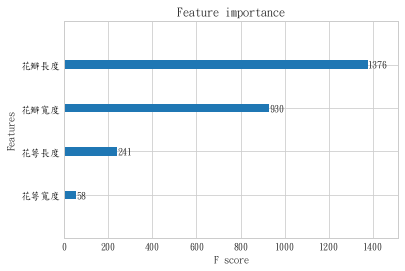

In [36]:
from xgboost import plot_importance
plot_importance(gbm, )
plt.show()

In [37]:
pred = gbm.predict(test[['花瓣寬度','花瓣長度','花萼寬度','花萼長度']])

In [38]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3])

In [39]:
StackingSubmission = pd.DataFrame({ 'id': submission.id, 'type': pred })
StackingSubmission.to_csv("submission.csv", index=False)

In [40]:
submission = pd.read_csv('submission.csv', encoding = "utf-8", dtype = {'type': np.int32})
submission

,id,type
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1
